<a href="https://colab.research.google.com/github/Romal27/DSGP-24-Retina94/blob/Validating-the-input/RF_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

MODEL_PATH = "D:/efficientnet_model_corrected.h5" # The one before, test accuracy 0.9872
IMG_SIZE = (224, 224)

model = load_model(MODEL_PATH)

In [3]:
def preprocess_image(image_path):
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    image = img_to_array(image) / 255.0 
    image = np.expand_dims(image, axis=0)  
    return image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


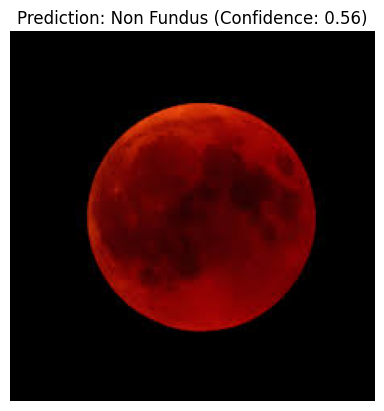

Predicted: Non Fundus with confidence 0.56


In [8]:
import os
def predict_image(image_path):
    
    image = preprocess_image(image_path)
    prediction = model.predict(image)[0][0]
    label = "Fundus" if prediction > 0.5 else "Non Fundus"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    
  
    plt.imshow(cv2.imread(image_path)[..., ::-1])
    plt.axis("off")
    plt.title(f"Prediction: {label} (Confidence: {confidence:.2f})")
    plt.show()

    print(f"Predicted: {label} with confidence {confidence:.2f}")

if __name__ == "__main__":
    image_path = r"C:\Users\User\Downloads\images (36).jpeg"
 
    if os.path.exists(image_path):
        predict_image(image_path)
    else:
        print("Invalid image path. Please try again.")




Found 4510 validated image filenames belonging to 2 classes.
Found 1127 validated image filenames belonging to 2 classes.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.8574 - loss: 0.6019 - val_accuracy: 0.5040 - val_loss: 5.0541 - learning_rate: 1.0000e-04
Epoch 2/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9507 - loss: 0.2739 - val_accuracy: 0.5049 - val_loss: 5.4875 - learning_rate: 1.0000e-04
Epoch 3/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9539 - loss: 0.2802 - val_accuracy: 0.6735 - val_loss: 2.7756 - learning_rate: 1.0000e-04
Epoch 4/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9617 - loss: 0.2556 - val_accuracy: 0.8172 - val_loss: 1.7817 - learning_rate: 1.0000e-04
Epoch 5/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.9620 - loss: 0.2489 - val_accuracy: 0.8749 - val_loss: 1.0974 - learning_rate: 1.0000e-04
Epoch 6/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.9691 - loss: 0.2409 - val_accuracy: 0.8873 - val_loss: 0.8967 - learning_rate: 1.0000e-04
Epoch 7/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - acc

Model saved successfully!


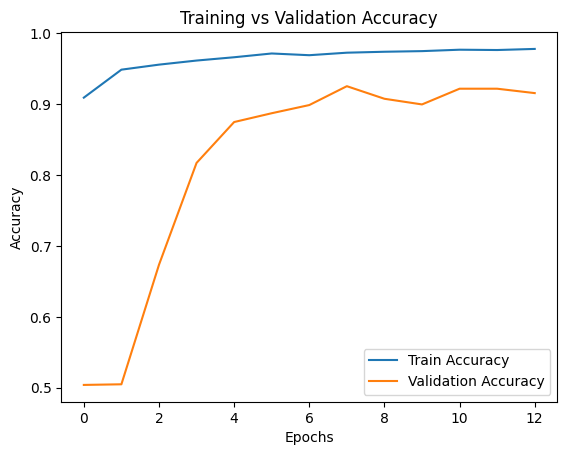

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths
DATASET_PATH = "D:/Data1"
MODEL_SAVE_PATH = "D:/model_test_fixed.h5"

# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25  # More epochs for stable training
LEARNING_RATE = 1e-4

def data_generators():
    train_gen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=40,  # More rotation
        width_shift_range=0.3,  # More shift
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        brightness_range=[0.6, 1.4],  # More brightness variation
        validation_split=0.2
    )
    return train_gen

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(5e-4), input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.2),

        Conv2D(64, (3, 3), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(5e-4)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.2),

        Conv2D(128, (3, 3), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(5e-4)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        Conv2D(128, (3, 3), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(5e-4)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        Flatten(),
        Dense(128, activation="relu"),  # Reduced complexity from 256 to 128
        Dropout(0.6),  # Stronger dropout
        Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss="binary_crossentropy", metrics=["accuracy"])
    return model

def compute_class_weights(labels):
    counter = Counter(labels)
    total = sum(counter.values())
    weight_0 = total / (2 * counter[0])
    weight_1 = total / (2 * counter[1])
    return {0: weight_0, 1: weight_1}

def load_dataset():
    files, labels = [], []
    for category in ["Non Fundus", "Fundus"]:
        category_path = os.path.join(DATASET_PATH, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f"Dataset path not found: {category_path}")
        for file in os.listdir(category_path):
            files.append(os.path.join(category_path, file))
            labels.append(0 if category == "Non Fundus" else 1)

    X = np.array(files)
    y = np.array(labels)
    
    # Adjusted to use 80% of the entire dataset as training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    train_gen = data_generators()

    df_train = pd.DataFrame({"filename": X_train, "class": y_train.astype(str)})
    
    train_generator = train_gen.flow_from_dataframe(
        df_train, x_col="filename", y_col="class", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="binary", subset="training"
    )

    val_generator = train_gen.flow_from_dataframe(
        df_train, x_col="filename", y_col="class", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="binary", subset="validation"
    )

    model = build_model()
    class_weight = compute_class_weights(y_train)

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=EPOCHS,
        class_weight=class_weight,
        callbacks=[early_stopping, reduce_lr]
    )

    model.save(MODEL_SAVE_PATH)
    print("Model saved successfully!")

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training vs Validation Accuracy")
    plt.show()

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = load_dataset()
    train_model(X_train, y_train)


Found 4510 validated image filenames belonging to 2 classes.
Found 1127 validated image filenames belonging to 2 classes.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 957s 7s/step - accuracy: 0.5300 - loss: 0.7019 - val_accuracy: 0.4960 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 750s 5s/step - accuracy: 0.4836 - loss: 0.6975 - val_accuracy: 0.4960 - val_loss: 0.6924 - learning_rate: 1.0000e-04
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.5106 - loss: 0.6940 - val_accuracy: 0.5067 - val_loss: 0.6917 - learning_rate: 1.0000e-04
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 497s 4s/step - accuracy: 0.5135 - loss: 0.6934 - val_accuracy: 0.5040 - val_loss: 0.6922 - learning_rate: 1.0000e-04
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.5077 - loss: 0.6927 - val_accuracy: 0.5244 - val_loss: 0.6922 - learning_rate: 1.0000e-04
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5129 - loss: 0.6927
Epoch 6: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
141/141 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy:

Model saved successfully!
Final Training Accuracy: 0.5202
Final Validation Accuracy: 0.8660


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 1409 validated image filenames belonging to 2 classes.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9004 - loss: 0.6719
Test Accuracy: 0.9021


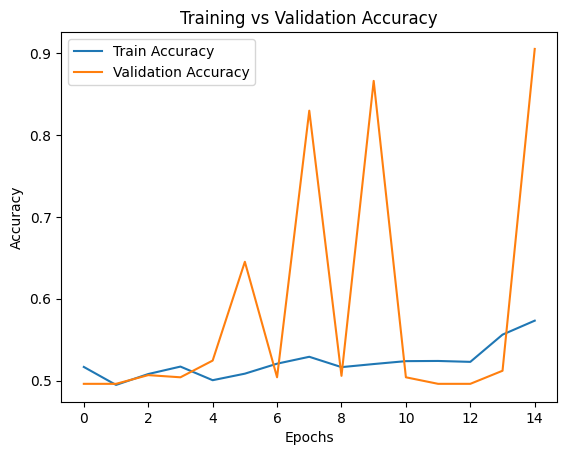

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths
DATASET_PATH = "D:/Data1"
MODEL_SAVE_PATH = "D:/efficientnet_model.h5"

# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
LEARNING_RATE = 1e-4

# Data Augmentation
def data_generators():
    train_gen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        brightness_range=[0.6, 1.4],
        channel_shift_range=0.2,
        preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
        validation_split=0.2
    )
    return train_gen

# Load Dataset
def load_dataset():
    files, labels = [], []
    for category in ["Non Fundus", "Fundus"]:
        category_path = os.path.join(DATASET_PATH, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f"Dataset path not found: {category_path}")
        for file in os.listdir(category_path):
            files.append(os.path.join(category_path, file))
            labels.append(0 if category == "Non Fundus" else 1)

    X = np.array(files)
    y = np.array(labels)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Build Model
def build_model():
    base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Compute Class Weights
def compute_class_weights(labels):
    counter = Counter(labels)
    total = sum(counter.values())
    weight_0 = total / (2 * counter[0])
    weight_1 = total / (2 * counter[1])
    return {0: weight_0, 1: weight_1}

# Training Function
def train_model(X_train, X_test, y_train, y_test):
    train_gen = data_generators()

    df_train = pd.DataFrame({"filename": X_train, "class": y_train.astype(str)})

    train_generator = train_gen.flow_from_dataframe(
        df_train, x_col="filename", y_col="class", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="binary", subset="training"
    )

    val_generator = train_gen.flow_from_dataframe(
        df_train, x_col="filename", y_col="class", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="binary", subset="validation"
    )

    model = build_model()
    class_weight = compute_class_weights(y_train)

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1)

    # Train Top Layers
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        class_weight=class_weight,
        callbacks=[early_stopping, reduce_lr]
    )

    # Fine-tune Model
    model.layers[0].trainable = True
    for layer in model.layers[0].layers[:-10]:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=1e-5), loss="binary_crossentropy", metrics=["accuracy"])

    history_finetune = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=5,
        class_weight=class_weight,
        callbacks=[early_stopping, reduce_lr]
    )

    # Save Model
    model.save(MODEL_SAVE_PATH)
    print("Model saved successfully!")

    # Print Final Accuracies
    final_train_acc = history.history['accuracy'][-1] if history.history['accuracy'] else 0
    final_val_acc = history.history['val_accuracy'][-1] if history.history['val_accuracy'] else 0
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")

    # Evaluate on Test Set
    test_generator = train_gen.flow_from_dataframe(
        pd.DataFrame({"filename": X_test, "class": y_test.astype(str)}),
        x_col="filename", y_col="class", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="binary", shuffle=False
    )
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_acc:.4f}")

    # Plot Accuracy Curve
    plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training vs Validation Accuracy")
    plt.show()

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = load_dataset()
    train_model(X_train, X_test, y_train, y_test)

Found 4791 validated image filenames belonging to 2 classes.
Found 845 validated image filenames belonging to 2 classes.
Found 1410 validated image filenames belonging to 2 classes.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these argume

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.7348 - loss: 0.7366 - val_accuracy: 0.9799 - val_loss: 0.2477 - learning_rate: 1.0000e-04
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9584 - loss: 0.2864 - val_accuracy: 0.9988 - val_loss: 0.1894 - learning_rate: 1.0000e-04
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.9827 - loss: 0.2302 - val_accuracy: 0.9988 - val_loss: 0.1741 - learning_rate: 1.0000e-04
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.9905 - loss: 0.2033 - val_accuracy: 0.9988 - val_loss: 0.1677 - learning_rate: 1.0000e-04
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.9863 - loss: 0.2020 - val_accuracy: 1.0000 - val_loss: 0.1639 - learning_rate: 1.0000e-04
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.9869 - loss: 0.1976 - val_accuracy: 0.9988 - val_loss: 0.1616 - learning_rate: 1.0000e-04
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - acc

Model Saved Successfully
45/45 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9926 - loss: 0.1524
Test Accuracy: 0.9950
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
              precision    recall  f1-score   support

  Non Fundus       0.99      1.00      1.00       730
      Fundus       1.00      0.99      0.99       680

    accuracy                           1.00      1410
   macro avg       1.00      0.99      1.00      1410
weighted avg       1.00      1.00      1.00      1410



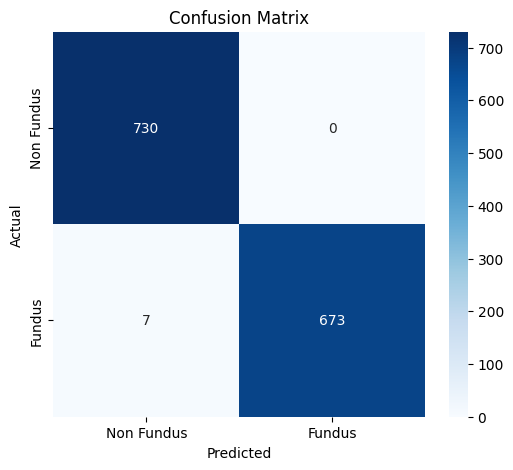

In [8]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

# Paths
DATASET_PATH = "D:/Data1"
MODEL_SAVE_PATH = "D:/mobilenet_fundus_nonfundus_classifier.h5"

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20  
LEARNING_RATE = 1e-4  
# Data Preparation
def prepare_data():
    files, labels = [], []
    for category in ["Non Fundus", "Fundus"]:
        category_path = os.path.join(DATASET_PATH, category)
        for file in os.listdir(category_path):
            files.append(os.path.join(category_path, file))
            labels.append(category)  # Keep as string

    df = pd.DataFrame({'filename': files, 'class': labels})  
    return train_test_split(df, test_size=0.2, stratify=df['class'], random_state=42)

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing images between 0 and 1
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15  
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Model Building
def build_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))

    # Initially freeze all layers
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),  
        BatchNormalization(),
        Dropout(0.5),  
        Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),  
        BatchNormalization(),
        Dropout(0.5),  
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Compute Class Weights
def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return {cls: majority / count for cls, count in counter.items()}

# Train and Evaluate
def train_and_evaluate():
    train_df, test_df = prepare_data()

    train_generator = train_datagen.flow_from_dataframe(
        train_df, x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='binary', subset='training', shuffle=True)

    val_generator = train_datagen.flow_from_dataframe(
        train_df, x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='binary', subset='validation', shuffle=True)

    test_generator = test_datagen.flow_from_dataframe(
        test_df, x_col='filename', y_col='class', target_size=IMG_SIZE,
        batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)

    class_weights = get_class_weights(train_df['class'])

    model = build_model()

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
    ]

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=EPOCHS,
        class_weight=class_weights,
        callbacks=callbacks
    )

    # Fine-tuning: Unfreeze last 30 layers
    for layer in model.layers[0].layers[-30:]:
        layer.trainable = True

    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE / 10), loss='binary_crossentropy', metrics=['accuracy'])

    # Train again with fine-tuning
    history_fine = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=EPOCHS // 2,
        class_weight=class_weights,
        callbacks=callbacks
    )

    # Save Model
    model.save(MODEL_SAVE_PATH)
    print("Model Saved Successfully")

    # Evaluate on Test Data
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_acc:.4f}")

    # Predictions and Classification Report
    predictions = (model.predict(test_generator) > 0.5).astype('int32').flatten()
    actual = test_generator.classes

    print(classification_report(actual, predictions, target_names=['Non Fundus', 'Fundus']))

    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(actual, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fundus', 'Fundus'], yticklabels=['Non Fundus', 'Fundus'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

if __name__ == "__main__":
    train_and_evaluate()


In [ ]:
import os
import shutil
import random
import hashlib

dataset_path = 'D:/Data1'  


output_base_path = 'D:/Data1_Split'  
# Define split ratios
train_split = 0.7  # 70% Training
val_split = 0.15   # 15% Validation
test_split = 0.15  # 15% Test

# Ensure dataset exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path '{dataset_path}' not found!")

def get_file_hash(filepath):
    """Returns a SHA256 hash of the file to detect duplicate images."""
    hasher = hashlib.sha256()
    with open(filepath, 'rb') as f:
        hasher.update(f.read())
    return hasher.hexdigest()

# Loop through Fundus and Non_Fundus categories
for category in ['Fundus', 'Non Fundus']:
    category_path = os.path.join(dataset_path, category)

    if not os.path.exists(category_path):
        print(f"Skipping missing category: {category}")
        continue

 
    images = os.listdir(category_path)

    # Remove non-image files (if any)
    images = [img for img in images if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
   
    random.shuffle(images)

    # Compute split sizes
    total_images = len(images)
    train_count = int(total_images * train_split)
    val_count = int(total_images * val_split)
    test_count = total_images - train_count - val_count  # Remaining images go to test

    # Define output paths
    train_dir = os.path.join(output_base_path, category, 'train')
    val_dir = os.path.join(output_base_path, category, 'validation')
    test_dir = os.path.join(output_base_path, category, 'test')

    # Create category-wise train, val, and test directories
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Track hashes to prevent duplicate images
    hash_set = set()

    # Move images into their respective directories
    for i, img in enumerate(images):
        src = os.path.join(category_path, img)

        # Compute hash to prevent duplicate leakage
        img_hash = get_file_hash(src)

        if img_hash in hash_set:
            print(f"Warning: Duplicate image detected and skipped - {img}")
            continue  # Skip duplicate images

        hash_set.add(img_hash)

        if i < train_count:
            dest = os.path.join(train_dir, img)
        elif i < train_count + val_count:
            dest = os.path.join(val_dir, img)
        else:
            dest = os.path.join(test_dir, img)

        shutil.move(src, dest)

# Summary report after splitting
print("\n Dataset successfully split into Train, Validation, and Test sets!")
print(f" Train Images: {len(os.listdir(train_dir))} per category")
print(f" Validation Images: {len(os.listdir(val_dir))} per category")
print(f" Test Images: {len(os.listdir(test_dir))} per category")
print(" No duplicate images were found in multiple sets. Data leakage prevented!")



 Dataset successfully split into Train, Validation, and Test sets!
 Train Images: 2379 per category
 Validation Images: 509 per category
 Test Images: 511 per category
 No duplicate images were found in multiple sets. Data leakage prevented!


Found 4931 images belonging to 2 classes.
Found 1056 images belonging to 2 classes.
Found 1059 images belonging to 2 classes.


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.9156 - loss: 0.1748 - val_accuracy: 0.9953 - val_loss: 0.0159
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9960 - loss: 0.0242 - val_accuracy: 0.9981 - val_loss: 0.0168
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9972 - val_loss: 0.0223
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9972 - val_loss: 0.0153
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9972 - val_loss: 0.0328
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.9974 - loss: 0.0158 - val_accuracy: 0.9848 - val_loss: 0.1378
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9933 - loss: 0.0404 - val_accuracy: 0.9981 - val_loss: 0.0069
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9983 - loss: 0.0045 - val_accu

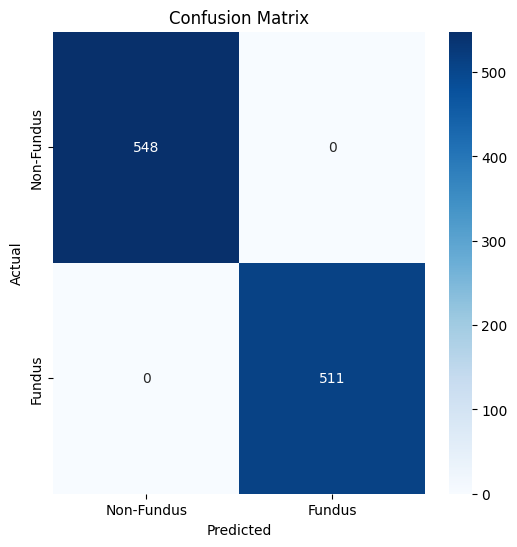

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set dataset paths
dataset_path = "D:/Data1_Split/"
train_dir = dataset_path + "Train"
val_dir = dataset_path + "Validation"
test_dir = dataset_path + "Test"

# Image parameters
img_height, img_width = 224, 224  # Adjust based on dataset
batch_size = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

# Define CNN Model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and Train Model
model = create_cnn_model()

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Print Training Accuracy
train_acc = history.history['accuracy'][-1] * 100
print(f"Final Training Accuracy: {train_acc:.2f}%")

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Generate Predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)
y_true = test_generator.classes

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Fundus', 'Fundus']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fundus', 'Fundus'], yticklabels=['Non-Fundus', 'Fundus'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the Model
model.save("fundus_classifier.h5")


In [2]:
pip install tensorflow scikit-learn matplotlib seaborn numpy


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 466.4 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/8.1 MB 466.4 kB/s eta 0:00:17
   -- ---------------------------


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Found 4931 images belonging to 2 classes.
Found 1056 images belonging to 2 classes.
Found 1059 images belonging to 2 classes.
71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 55s 1us/step


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 839s 5s/step - accuracy: 0.5307 - loss: 0.6904 - val_accuracy: 0.6269 - val_loss: 0.6452
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1406s 9s/step - accuracy: 0.6396 - loss: 0.6579 - val_accuracy: 0.6799 - val_loss: 0.6124
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 852s 6s/step - accuracy: 0.6576 - loss: 0.6402 - val_accuracy: 0.8447 - val_loss: 0.5886
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 773s 5s/step - accuracy: 0.6821 - loss: 0.6236 - val_accuracy: 0.8456 - val_loss: 0.5648
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1272s 8s/step - accuracy: 0.6904 - loss: 0.6181 - val_accuracy: 0.8759 - val_loss: 0.5480
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 802s 5s/step - accuracy: 0.7014 - loss: 0.6043 - val_accuracy: 0.7064 - val_loss: 0.5585
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 901s 6s/step - accuracy: 0.6853 - loss: 0.6133 - val_accuracy: 0.8201 - val_loss: 0.5290
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 709s 5s/step - accuracy: 0.7200 - loss: 0.5893 - val_ac

34/34 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.9482 - loss: 0.5561
Test Accuracy: 0.9330
34/34 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step

Classification Report:
              precision    recall  f1-score   support

  Non-Fundus       0.92      0.95      0.94       548
      Fundus       0.95      0.91      0.93       511

    accuracy                           0.93      1059
   macro avg       0.93      0.93      0.93      1059
weighted avg       0.93      0.93      0.93      1059



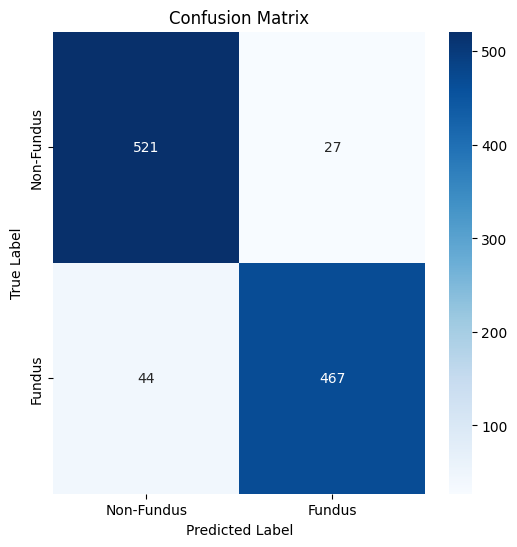

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix


DATASET_PATH = "D:/Data1_split"
IMG_SIZE = 380  # EfficientNet-B4 default size
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    f"{DATASET_PATH}/Train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
validation_generator = val_test_datagen.flow_from_directory(
    f"{DATASET_PATH}/Validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    f"{DATASET_PATH}/Test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False 

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)  
x = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=x)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the trained model
model.save("classification_model.h5")


test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Fundus', 'Fundus']))

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes=['Non-Fundus', 'Fundus'])

In [33]:
print(test_generator.class_indices)


{'Fundus': 0, 'Non Fundus': 1}


In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model(r"D:\classification_model.h5")

# Ensure correct input size
IMG_SIZE = (380, 380)

# Image preprocessing function
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = cv2.resize(image, IMG_SIZE)  # Resize to EfficientNetB4 input size
    image = img_to_array(image)
    image = preprocess_input(image)  
    image = np.expand_dims(image, axis=0)  
    return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


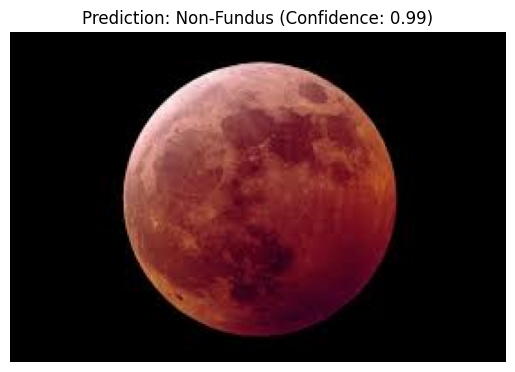

Predicted: Non-Fundus with confidence 0.99


In [23]:


# Prediction function
def predict_image(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)[0][0]
    
    # Ensure label mapping is correct
    label = "Non-Fundus" if prediction > 0.5 else "Fundus"
    confidence = max(prediction, 1 - prediction) 
    
    # Display image with prediction
    plt.imshow(cv2.imread(image_path)[..., ::-1])
    plt.axis("off")
    plt.title(f"Prediction: {label} (Confidence: {confidence:.2f})")
    plt.show()
    
    print(f"Predicted: {label} with confidence {confidence:.2f}")


image_path = r"C:\Users\User\Downloads\images (33).jpeg"  
predict_image(image_path)
